## 18th February 
Attempts to use RK4 integrator to propagate the 2 body central force problem

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def force(r1,r2,m1,m2):
    """Force function is define to be used repeatly throughout the mini-projection 
    to calculate the force of one body on other body.
    
    Inputs:
    r1 - position of mass 1
    r2 - position of mass 2
    m1 - mass 1
    m2 - mass 2
    # G is defined outside of this function
    
    Returns:
    Force - force experienced by mass 1
    
    """
    # Find r_12 and its magnitude
    r12 = r2 - r1
    
    
    mag_r12 = np.linalg.norm(r2-r1) # np.linalg.norm helps to find the magnitude of a vector
    f_on_m1 = G*m1*m2*r12/(mag_r12**3)
    return f_on_m1

## Reference
I have make use of the RK4 code from the exercise in Week 4.

In [3]:
def RK4_solver(fun,y0,dt,N):
    """Solve dy/dt = fun(y,t) using fourth-order RK method.
    Inputs:
    fun  f(y,t) - RH
    y0   Initial condition - 4 component (x,y,vx,vy)
    dt   Step size
    N    Number of steps
    
    Returns: 4 arrays of length N+1 (x,y and vx,vy or equivalent), KE, PE and total momentum
    """
    # Storage for solution
    y = np.zeros((N+1,len(y0)))
    
    KE = np.zeros((N+1))
    PE = np.zeros((N+1))
    L = np.zeros((N+1))
    
    # Initial condition
    y[0] = y0
    t = 0
    for i in range(N):
        # RK4 formulae
        k1 = dt*fun(y[i],t)
        k2 = dt*fun(y[i]+0.5*k1,t+0.5*dt)
        k3 = dt*fun(y[i]+0.5*k2,t+0.5*dt)
        k4 = dt*fun(y[i]+k3,t+dt)
        y[i+1]=y[i]+(k1+2*k2+2*k3+k4)/6
        
        r2_origin = np.array([0,0])
        KE[i+1] = 0.5* (m1 *np.linalg.norm(np.array([y[i+1,2],y[i+1,3]]))**2)
        PE[i+1] = -G * m1 *m2 /np.linalg.norm(r2_origin -np.array([y[i+1,0],y[i+1,1]]) )
    
    
        # Angular momentum
        L[i+1] = m1 * np.linalg.norm(r2_origin -np.array([y[i+1,0],y[i+1,1]]))* np.linalg.norm(np.array([y[i+1,2],y[i+1,3]]))
        
        t += dt
    return y,KE,PE,L

In [4]:
def RHS_two_body_force_Function(y,t):
    """Idea is to calculate the dx,dy,dvx,dvy for later RK4 calculation
    
    Inputs:
    y_n   4D vector containing r_x, r_y, v_x and v_y
    t     Time (unused)
    
    Output:
    dy_n  4D vector containing gradients dr and dv where r and d are 2D vector
    """
    g = 9.8
    L = 1.0
    # Separate for clarity
    r = np.array([y[0],y[1]])
    v = np.array([y[2],y[3]])
    dr = v
    
    # calculate force
    r2_origin = np.array([0,0])
    F12=force(r,r2_origin,m1,m2)
    dv = F12/m1
    return np.array([dr[0],dr[1],dv[0],dv[1]])

"\n# x vs y plot \nax1.set_title('y vs x')\nax1.set_xlabel('x')\nax1.set_ylabel('y')\nax1.plot(rv[:,0],rv[:,1],label='m=0.0001 ')\nax1.plot(r2_origin[0],r2_origin[1],marker='.',label='m=1')\n"

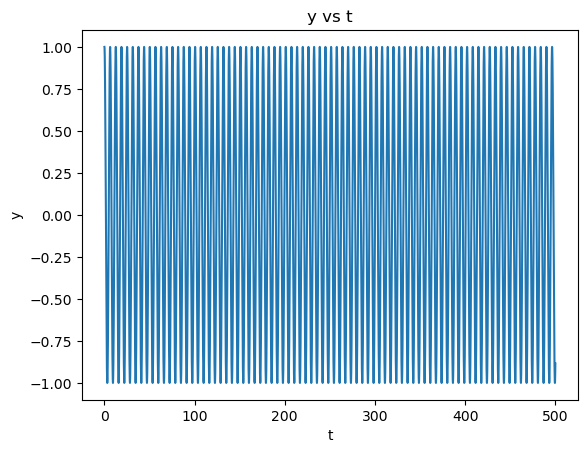

In [5]:
# Set up parameters
Ndim = 2     #2D problem for now
dt = 0.01
Nsteps = 50000
G = 1       # Appropriate units
m1 = 0.0001 # Small
m2 = 1     # Large
r2_origin = np.array([0,0])

# Initial conditions
r1 = np.array(( 0,1 ))
v1 = np.array(( 1,0 ))
y0 = [0,1,1,0]


# RK4 propagation
lin_p = RK4_solver(RHS_two_body_force_Function,y0,dt,Nsteps)

# extracting the position and vector, energies,... quantities
rv = lin_p[0]
KE = lin_p[1]
PE = lin_p[2]
L  = lin_p[3]

# y vs t plot
t=np.linspace(0,Nsteps*dt,Nsteps+1)
plt.title('y vs t')
plt.xlabel('t')
plt.ylabel('y')
plt.plot(t,rv[:,1])

# the code below are just extra code for plot different plot for the RK4 method

'''
t=np.linspace(0,Nsteps*dt,Nsteps+1)
#plt.plot(rv[:,0],rv[:,1],label='m=0.0001 ')
plt.plot(t,rv[:,1])
#plt.plot(r2_origin[0],r2_origin[1],marker='.',label='m=1')
plt.xlabel("x")
plt.ylabel("y")
plt.title("RK4")

plt.legend(loc='lower right')
'''
'''
fig, axs = plt.subplots(1, 2, constrained_layout=True)
axs[0].plot(rv[:,0],rv[:,1], '-', r2_origin[0],r2_origin[1], 'o')
axs[0].set_title('y vs x')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_aspect('equal')

fig.suptitle('RK4', fontsize=16)

t=np.linspace(0,Nsteps*dt,Nsteps+1)
axs[1].plot(t,rv[:,1], '-')
axs[1].set_xlabel('t')
axs[1].set_title('y vs t')
axs[1].set_ylabel('y')



plt.show()
plt.savefig('plot.png',transparent=True)
'''


'''
# x vs y plot 
ax1.set_title('y vs x')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.plot(rv[:,0],rv[:,1],label='m=0.0001 ')
ax1.plot(r2_origin[0],r2_origin[1],marker='.',label='m=1')
'''


In [6]:

r2_origin=np.array([0,0])
r1=np.array([rv[0,0],rv[0,1]])
v1=np.array([rv[0,2],rv[0,3]])
#Initial boundary for KE, PE and Total momentum
KE_0 = 0.5* (m1 *np.linalg.norm(np.array(v1)**2))
PE_0 = -G * m1 *m2 /np.linalg.norm(r2_origin -r1) 

# Angular momentum
L_0 = m1 * np.linalg.norm(r2_origin -r1)* np.linalg.norm(np.array(v1))
    
KE[0]=KE_0
PE[0]=PE_0
L[0]=L_0


Text(0, 0.5, 'Energy in Joules')

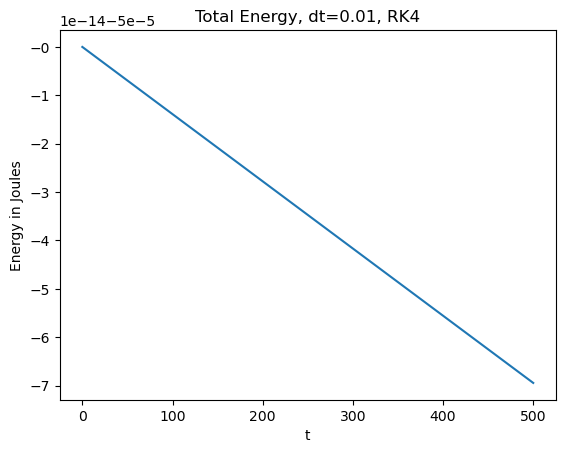

In [7]:
t=np.linspace(0,Nsteps*dt,Nsteps+1)
#Total energy vs t
total_E=KE+PE
plt.plot(t,total_E)
plt.title('Total Energy, dt=0.01, RK4')
plt.xlabel('t')
plt.ylabel('Energy in Joules')

Text(0, 0.5, 'Momentum in Kg.m2.s-1')

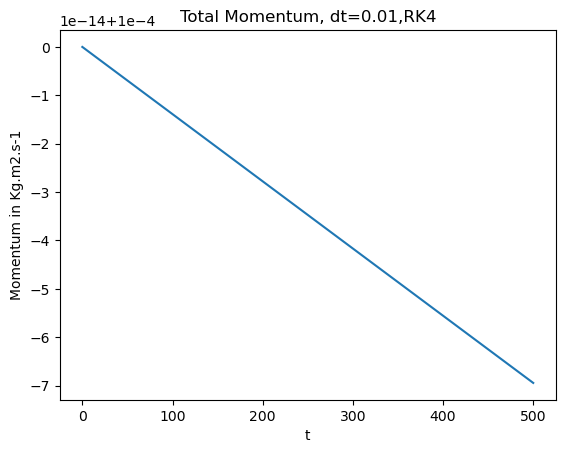

In [8]:
plt.plot(t,L)
plt.title('Total Momentum, dt=0.01,RK4')
plt.xlabel('t')
plt.ylabel('Momentum in Kg.m2.s-1')


### Discussion
As we compare this change in energy over time, this suggests that the RK4 obeys the conservation law much more better than the Euler method. RK4 integrator have energy fluctuation in order of -14, euler in order of -5. RK4 integrator have total momentum fluctuation in order of -14 but euler in order of -4.

# Comparison
In the rest of the code, we will compare the stability of the Euler and RK4 method for the central force 2-Body system.

### Euler Method

In [9]:
# Set up parameters
Ndim = 2     #2D problem for now
dt = 0.01
Nsteps = 50000
G = 1       # Appropriate units
m1 = 0.0001 # Small
m2 = 1     # Large

# Set up storage for the bodies's position and velocity at each time step
r1_E = np.zeros(( Nsteps ,Ndim  ))
r2_E = np.zeros(( Nsteps ,Ndim  ))
v1_E = np.zeros(( Nsteps ,Ndim  ))
v2_E = np.zeros(( Nsteps ,Ndim  ))
# Set up storage for energies at each time step
#Energies are scalar quantity so Ndim shouldn't be included
KE_E = np.zeros((Nsteps))
PE_E = np.zeros((Nsteps))
L_E = np.zeros((Nsteps))

# Initial conditions
'''
Based on simple calssical mechanics, in a circular orbit the gravitational force must equal to centripetal force, 
we can solve for v1=sqrt(G*M) given r=1, M=1 , G=1 giving v1 = 1.
If we let the intial position of mass 1 be (x,y)=(0,1) as radius is one, due to the velocity being 
perpendicular to the circumference we must have only horizontal velocity component but no vertical 
velocity component v1 = (1,0) assuming mass 1 is traversing around mass 2 counter-clockwise
'''
r1_E[0] = np.array(( 0,1 ))
v1_E[0] = np.array(( 1,0 ))

In [10]:
for i in range(Nsteps-1):
    # Mass 2 is stationary at the origin due to assumption of central force problem and for simplicity
    r2_origin = np.array([0,0])
    # v1 at next step = v1 at this step + dt * dv/dt where dv/dt = F/m1
    v1_E[i+1]=v1_E[i] + dt*force(r1_E[i],r2_origin,m1,m2)/m1
    # r1 at next step = r1 at this step + dt * dr/dt where dr/dt = v
    r1_E[i+1]= r1_E[i] +dt*v1_E[i]
    
    
    # KE for this stationary model, only mass 1 contributes to KE
    # Creating an array to store velocity magnitude (speed)
    
    KE_E[i] = 0.5* (m1 *np.linalg.norm(v1_E[i])**2) # v[i] needs to be converted to magnitude of v[i]
    
    # U = -Gm1m2/r12 for PE
    #creating an array to store r12
    r12 = np.zeros(( Nsteps))
    r12[i] = np.linalg.norm(r2_origin -r1_E[i]) #calculating the magnitude of r2 -r1
    PE_E[i] = -G * m1 *m2 /r12[i]
    
    
    # Angular momentum
    L_E[i] = m1 * r12[i]* np.linalg.norm(v1_E[i])
    # Final Total Angular momentum
    
    
# Final Case for Kinetic and Potential energy, Total Energy and Total Angular Momentum
KE_E[-1]= 0.5*m1*np.linalg.norm(v1_E[-1])
PE_E[-1]=  -G * m1 *m2 /(np.linalg.norm(r2_E[-1] -r1_E[-1]))
total_E_E = PE_E + KE_E
L_E[-1]= m1 * (np.linalg.norm(r2_E[-1] -r1_E[-1])) * np.linalg.norm(v1_E[-1]) 

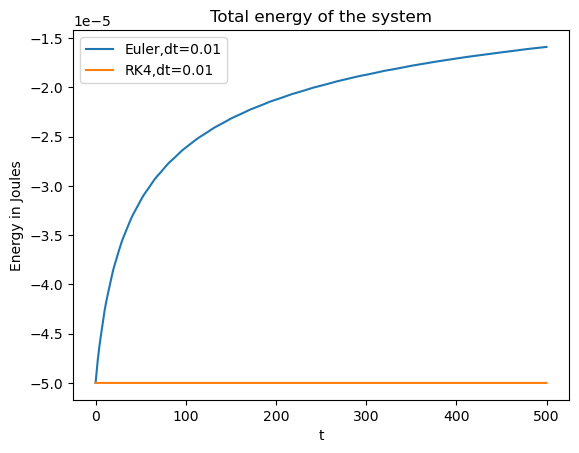

In [11]:
t=np.linspace(0,Nsteps*dt,Nsteps)
#Total energy vs t

plt.plot(t[:-2],total_E_E[:-2],label='Euler,dt=0.01')
plt.plot(t[:-2],total_E[:-3],label='RK4,dt=0.01')
plt.title('Total energy of the system')
plt.xlabel('t')
plt.ylabel('Energy in Joules')
plt.legend(loc='best')


[1.00000000e-04 1.00000000e-04 1.00000000e-04 ... 9.99999999e-05
 9.99999999e-05 9.99999999e-05]


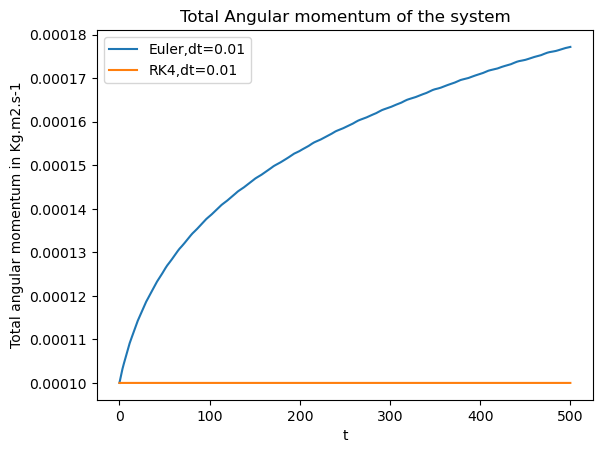

In [12]:
plt.plot(t[:-2],L_E[:-2],label='Euler,dt=0.01')
plt.plot(t[:-2],L[:-3],label='RK4,dt=0.01')
plt.title('Total Angular momentum of the system')
plt.xlabel('t')
plt.ylabel('Total angular momentum in Kg.m2.s-1')
plt.legend(loc='best')
print(L)